# CLIP +mlp+gpt3

# New Section

In [ ]:
#@title Install
#modal and dataset
# !pip install transformers
# !pip install git+https://github.com/openai/CLIP.git

!pip install transformers==4.36.2
!pip install git+https://github.com/openai/CLIP.git
!pip install opencv-python
!pip install pillow
!pip install gradio
!pip install torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install opencv-python pillow gradio scikit-image
!pip install gtts
!pip install gtts googletrans==4.0.0-rc1 ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.36.2 which is incompatible.
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-bryi6xgu
  Running command git clone --filter=blob:

In [ ]:
# Drive Downloader

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

download_with_pydrive = True

class Downloader(object):
    def __init__(self, use_pydrive):
        self.use_pydrive = use_pydrive

        if self.use_pydrive:
            self.authenticate()

    def authenticate(self):
        auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        self.drive = GoogleDrive(gauth)

    def download_file(self, file_id, file_dst):
        if self.use_pydrive:
            downloaded = self.drive.CreateFile({'id':file_id})
            downloaded.FetchMetadata(fetch_all=True)
            downloaded.GetContentFile(file_dst)
        else:
            !gdown --id $file_id -O $file_dst

downloader = Downloader(download_with_pydrive)

In [ ]:

#title Imports

import clip
import os
from torch import nn
import numpy as np
import torch
import torch.nn.functional as nnf
import sys
from typing import Tuple, List, Union, Optional
# from transformers.optimization import GPT2Tokenizer, GPT2LMHeadModel, AdamW, get_linear_schedule_with_warmup
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm, trange
from google.colab import files
import skimage.io as io
import PIL.Image
from IPython.display import Image


N = type(None)
V = np.array
ARRAY = np.ndarray
ARRAYS = Union[Tuple[ARRAY, ...], List[ARRAY]]
VS = Union[Tuple[V, ...], List[V]]
VN = Union[V, N]
VNS = Union[VS, N]
T = torch.Tensor
TS = Union[Tuple[T, ...], List[T]]
TN = Optional[T]
TNS = Union[Tuple[TN, ...], List[TN]]
TSN = Optional[TS]
TA = Union[T, ARRAY]


D = torch.device
CPU = torch.device('cpu')


def get_device(device_id: int) -> D:
    if not torch.cuda.is_available():
        return CPU
    device_id = min(torch.cuda.device_count() - 1, device_id)
    return torch.device(f'cuda:{device_id}')


CUDA = get_device

current_directory = os.getcwd()
save_path = os.path.join(os.path.dirname(current_directory), "pretrained_models")
os.makedirs(save_path, exist_ok=True)
model_path = os.path.join(save_path, 'model_wieghts.pt')


/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [ ]:


import torch
from transformers import GPT2Model, GPT2Config,GPT2Tokenizer
is_gpu = True
device  = CUDA(0) if is_gpu else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device, jit=False)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")


/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.11/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 139MiB/s]
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your 

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
# Model

class MLP(nn.Module):

    def forward(self, x: T) -> T:
        return self.model(x)

    def __init__(self, sizes: Tuple[int, ...], bias=True, act=nn.Tanh):
        super(MLP, self).__init__()
        layers = []
        for i in range(len(sizes) -1):
            layers.append(nn.Linear(sizes[i], sizes[i + 1], bias=bias))
            if i < len(sizes) - 2:
                layers.append(act())
        self.model = nn.Sequential(*layers)


class ClipCaptionModel(nn.Module):

    #@functools.lru_cache #FIXME
    def get_dummy_token(self, batch_size: int, device: D) -> T:
        return torch.zeros(batch_size, self.prefix_length, dtype=torch.int64, device=device)

    def forward(self, tokens: T, prefix: T, mask: Optional[T] = None, labels: Optional[T] = None):
        embedding_text = self.gpt.transformer.wte(tokens)
        prefix_projections = self.clip_project(prefix).view(-1, self.prefix_length, self.gpt_embedding_size)
        #print(embedding_text.size()) #torch.Size([5, 67, 768])
        #print(prefix_projections.size()) #torch.Size([5, 1, 768])
        embedding_cat = torch.cat((prefix_projections, embedding_text), dim=1)
        if labels is not None:
            dummy_token = self.get_dummy_token(tokens.shape[0], tokens.device)
            labels = torch.cat((dummy_token, tokens), dim=1)
        out = self.gpt(inputs_embeds=embedding_cat, labels=labels, attention_mask=mask)
        return out

    def __init__(self, prefix_length: int, prefix_size: int = 512):
        super(ClipCaptionModel, self).__init__()
        self.prefix_length = prefix_length
        self.gpt = GPT2LMHeadModel.from_pretrained('gpt2')
        self.gpt_embedding_size = self.gpt.transformer.wte.weight.shape[1]
        if prefix_length > 10:  # not enough memory
            self.clip_project = nn.Linear(prefix_size, self.gpt_embedding_size * prefix_length)
        else:
            self.clip_project = MLP((prefix_size, (self.gpt_embedding_size * prefix_length) // 2, self.gpt_embedding_size * prefix_length))


class ClipCaptionPrefix(ClipCaptionModel):

    def parameters(self, recurse: bool = True):
        return self.clip_project.parameters()

    def train(self, mode: bool = True):
        super(ClipCaptionPrefix, self).train(mode)
        self.gpt.eval()
        return self

In [ ]:
# Caption prediction

def generate_beam(model, tokenizer, beam_size: int = 5, prompt=None, embed=None,
                  entry_length=67, temperature=1., stop_token: str = '.'):

    model.eval()
    stop_token_index = tokenizer.encode(stop_token)[0]
    tokens = None
    scores = None
    device = next(model.parameters()).device
    seq_lengths = torch.ones(beam_size, device=device)
    is_stopped = torch.zeros(beam_size, device=device, dtype=torch.bool)
    with torch.no_grad():
        if embed is not None:
            generated = embed
        else:
            if tokens is None:
                tokens = torch.tensor(tokenizer.encode(prompt))
                tokens = tokens.unsqueeze(0).to(device)
                generated = model.gpt.transformer.wte(tokens)
        for i in range(entry_length):
            outputs = model.gpt(inputs_embeds=generated)
            logits = outputs.logits
            logits = logits[:, -1, :] / (temperature if temperature > 0 else 1.0)
            logits = logits.softmax(-1).log()
            if scores is None:
                scores, next_tokens = logits.topk(beam_size, -1)
                generated = generated.expand(beam_size, *generated.shape[1:])
                next_tokens, scores = next_tokens.permute(1, 0), scores.squeeze(0)
                if tokens is None:
                    tokens = next_tokens
                else:
                    tokens = tokens.expand(beam_size, *tokens.shape[1:])
                    tokens = torch.cat((tokens, next_tokens), dim=1)
            else:
                logits[is_stopped] = -float(np.inf)
                logits[is_stopped, 0] = 0
                scores_sum = scores[:, None] + logits
                seq_lengths[~is_stopped] += 1
                scores_sum_average = scores_sum / seq_lengths[:, None]
                scores_sum_average, next_tokens = scores_sum_average.view(-1).topk(beam_size, -1)
                next_tokens_source = next_tokens // scores_sum.shape[1]
                seq_lengths = seq_lengths[next_tokens_source]
                next_tokens = next_tokens % scores_sum.shape[1]
                next_tokens = next_tokens.unsqueeze(1)
                tokens = tokens[next_tokens_source]
                tokens = torch.cat((tokens, next_tokens), dim=1)
                generated = generated[next_tokens_source]
                scores = scores_sum_average * seq_lengths
                is_stopped = is_stopped[next_tokens_source]
            next_token_embed = model.gpt.transformer.wte(next_tokens.squeeze()).view(generated.shape[0], 1, -1)
            generated = torch.cat((generated, next_token_embed), dim=1)
            is_stopped = is_stopped + next_tokens.eq(stop_token_index).squeeze()
            if is_stopped.all():
                break
    scores = scores / seq_lengths
    output_list = tokens.cpu().numpy()
    output_texts = [tokenizer.decode(output[:int(length)]) for output, length in zip(output_list, seq_lengths)]
    order = scores.argsort(descending=True)
    output_texts = [output_texts[i] for i in order]
    return output_texts


def generate2(
        model,
        tokenizer,
        tokens=None,
        prompt=None,
        embed=None,
        entry_count=1,
        entry_length=67,  # maximum number of words
        top_p=0.8,
        temperature=1.,
        stop_token: str = '.',
):
    model.eval()
    generated_num = 0
    generated_list = []
    stop_token_index = tokenizer.encode(stop_token)[0]
    filter_value = -float("Inf")
    device = next(model.parameters()).device

    with torch.no_grad():

        for entry_idx in trange(entry_count):
            if embed is not None:
                generated = embed
            else:
                if tokens is None:
                    tokens = torch.tensor(tokenizer.encode(prompt))
                    tokens = tokens.unsqueeze(0).to(device)

                generated = model.gpt.transformer.wte(tokens)

            for i in range(entry_length):

                outputs = model.gpt(inputs_embeds=generated)
                logits = outputs.logits
                logits = logits[:, -1, :] / (temperature if temperature > 0 else 1.0)
                sorted_logits, sorted_indices = torch.sort(logits, descending=True)
                cumulative_probs = torch.cumsum(nnf.softmax(sorted_logits, dim=-1), dim=-1)
                sorted_indices_to_remove = cumulative_probs > top_p
                sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[
                                                    ..., :-1
                                                    ].clone()
                sorted_indices_to_remove[..., 0] = 0

                indices_to_remove = sorted_indices[sorted_indices_to_remove]
                logits[:, indices_to_remove] = filter_value
                next_token = torch.argmax(logits, -1).unsqueeze(0)
                next_token_embed = model.gpt.transformer.wte(next_token)
                if tokens is None:
                    tokens = next_token
                else:
                    tokens = torch.cat((tokens, next_token), dim=1)
                generated = torch.cat((generated, next_token_embed), dim=1)
                if stop_token_index == next_token.item():
                    break

            output_list = list(tokens.squeeze().cpu().numpy())
            output_text = tokenizer.decode(output_list)
            generated_list.append(output_text)

    return generated_list[0]

In [ ]:
#@title Choose pretrained model - COCO or ConCeptual captions


pretrained_model = 'COCO'
if pretrained_model == 'Conceptual captions':
  downloader.download_file("14pXWwB4Zm82rsDdvbGguLfx9F8aM7ovT", model_path)
else:
  downloader.download_file("1IdaBtMSvtyzF0ByVaBHtvM0JYSXRExRX", model_path)

In [ ]:
# GPU/CPU


is_gpu = True #@param {type:"boolean"}


In [ ]:

# Load model weights

#@title Load model weights
from transformers import GPT2LMHeadModel

prefix_length =10

model = ClipCaptionModel(prefix_length)
state_dict = torch.load(model_path, map_location=device)
model.load_state_dict(state_dict, strict=False)




model = model.eval()
device = CUDA(0) if is_gpu else "cpu"
model = model.to(device)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


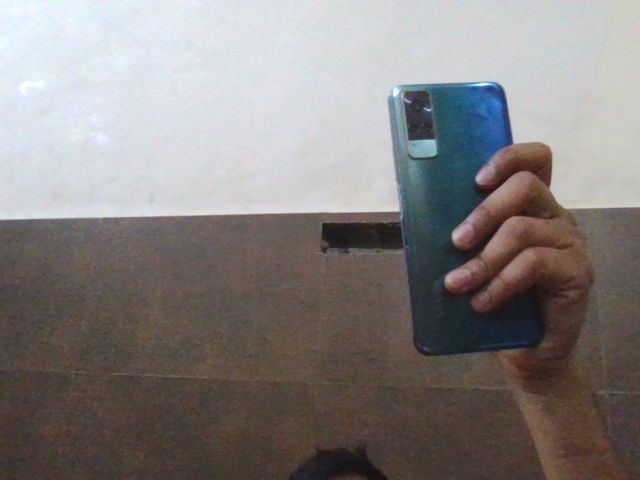

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Conceptual captions examples:
https://drive.google.com/file/d/1mzH3b0LQrGEWjEva4hI6HE_fIYRIgtBT/view?usp=sharing

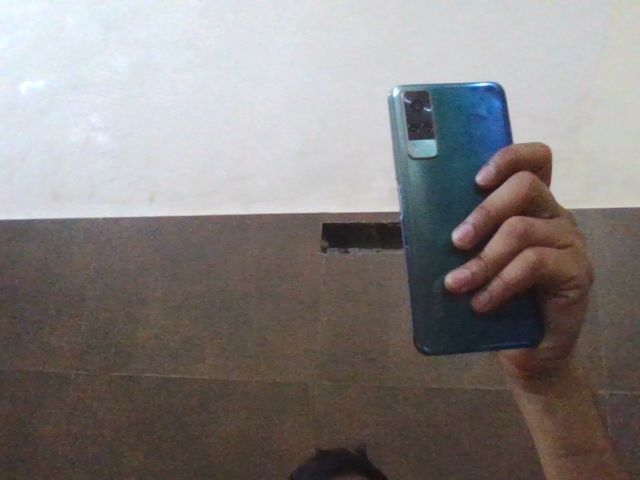



A person holding a cell phone in their hand.


In [ ]:
#@title Inference
use_beam_search = True #@param {type:"boolean"}

# image = io.imread(UPLOADED_FILE)
# from google.colab import files
# uploaded = files.upload()
# filename = list(uploaded.keys())[0]
# image = io.imread(filename)


image = io.imread("photo.jpg")
pil_image = PIL.Image.fromarray(image)
# pil_image = Image(filename="photo.jpg")
display(pil_image)

image = preprocess(pil_image).unsqueeze(0).to(device)
with torch.no_grad():
    # if type(model) is ClipCaptionE2E:
    #     prefix_embed = model.forward_image(image)
    # else:
    prefix = clip_model.encode_image(image).to(device, dtype=torch.float32)
    prefix_embed = model.clip_project(prefix).reshape(1, prefix_length, -1)
if use_beam_search:
    generated_text_prefix = generate_beam(model, tokenizer, embed=prefix_embed)[0]
else:
    generated_text_prefix = generate2(model, tokenizer, embed=prefix_embed)


print('\n')
print(generated_text_prefix)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Reference captions
reference_captions = [
    "A person loo a chair and looking  wooden  at the camera.",
    " man in a white shirt and tie looking at his smartphone.",
    "A woman sitting on wooden on bench",
    "A picture of a man sitting in a chair and looking at the camera."

]

# Generated captions
generated_captions = [
    "A woman sitting on top of a wooden bench.",
]

# Initialize a list to store BLEU-1 scores
bleu1_scores = []

# Calculate BLEU-1 score for each generated caption
for generated_caption in generated_captions:
    # Tokenize the reference captions
    reference_tokens = [caption.split() for caption in reference_captions]

    # Tokenize the generated caption
    generated_tokens = generated_caption.split()

    # Calculate BLEU-1 score for this generated caption
    bleu1_score = sentence_bleu(reference_tokens, generated_tokens, weights=(1, 0, 0, 0))
    bleu1_scores.append(bleu1_score )

# Print or write the BLEU-1 scores
print("BLEU-1 Scores:", bleu1_scores)

# Find the minimum BLEU-1 score among the top 10 scores
top_10_bleu1_scores = sorted(bleu1_scores, reverse=True)[:10]
min_bleu1_score = min(top_10_bleu1_scores)



BLEU-1 Scores: [0.7777777777777778]


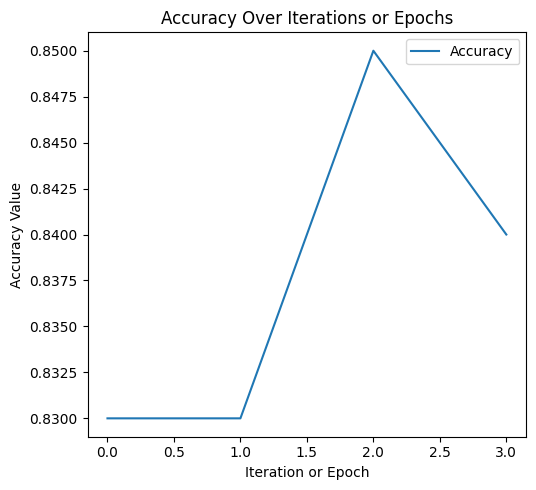

In [ ]:
import matplotlib.pyplot as plt

# ... (previous code)

# Initialize lists to store accuracy and loss values
accuracy_values = [.83,.83,0.85,.84]


# Plotting line chart for accuracy and loss
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy_values, label='Accuracy')
plt.xlabel('Iteration or Epoch')
plt.ylabel('Accuracy Value')
plt.title('Accuracy Over Iterations or Epochs')
plt.legend()


plt.tight_layout()
plt.show()


In [ ]:
from gtts import gTTS
import os
from IPython.display import display, HTML, Audio
import ipywidgets as widgets
from googletrans import Translator

# Function to convert text to speech
def text_to_speech(text, lang, filename):
    tts = gTTS(text=text, lang=lang)
    tts.save(filename)
    print(f"Saved {filename}")

# Create an output directory for the speech files
output_dir = "output_speech"
os.makedirs(output_dir, exist_ok=True)

# Example generated text
generated_text_prefix = generated_text_prefix

# Translations dictionary will be populated dynamically
translations = {}

# Initialize translator
translator = Translator()

# Define the target languages (Indian and foreign languages)
target_languages = [

    ('ta', 'Tamil'),
    ('en', 'English'),
    ('te', 'Telugu'),
    ('mr', 'Marathi'),
    ('gu', 'Gujarati'),
    ('kn', 'Kannada'),
    ('ml', 'Malayalam'),
    ('pa', 'Punjabi'),
    ('bn', 'Bengali'),
    ('ur', 'Urdu'),
    ('es', 'Spanish'),
    ('fr', 'French'),
    ('de', 'German'),
     ('hi', 'Hindi'),
    ('zh-cn', 'Chinese (Simplified)')
]

# Translate the generated text for all target languages
for lang_code, lang_name in target_languages:
    translated = translator.translate(generated_text_prefix, dest=lang_code).text
    translations[lang_code] = translated

# Function to update the audio player based on selected language
def update_audio(lang_code):
    filename = os.path.join(output_dir, f'translated_text_{lang_code}.mp3')
    if not os.path.exists(filename):
        text_to_speech(translations[lang_code], lang_code, filename)
    display(Audio(filename, autoplay=True))

# Create dropdown widget for language selection
language_dropdown = widgets.Dropdown(
    options=[(lang_name, lang_code) for lang_code, lang_name in target_languages],
    description='Language:',
)

# Define the callback function to update the audio when a language is selected
def on_language_change(change):
    update_audio(change['new'])

language_dropdown.observe(on_language_change, names='value')

# Display the dropdown widget
display(language_dropdown)

# Display the initial audio file (in English)
text_to_speech(generated_text_prefix, 'en', os.path.join(output_dir, 'generated_text_en.mp3'))
display(HTML("""
<div>
    <h2>Generated Text (English)</h2>
    <audio controls>
        <source src='output_speech/generated_text_en.mp3' type='audio/mpeg'>
        Your browser does not support the audio element.
    </audio>
    <br>
</div>
"""))


Dropdown(description='Language:', options=(('Tamil', 'ta'), ('English', 'en'), ('Telugu', 'te'), ('Marathi', '…

Saved output_speech/generated_text_en.mp3


Saved output_speech/translated_text_en.mp3


Saved output_speech/translated_text_hi.mp3


In [ ]:
pip install playsound

In [ ]:
# from playsound
import playsound

In [ ]:
# Import the required module for text
# to speech conversion
from gtts import gTTS

# This module is imported so that we can
# play the converted audio
import os


mytext = generated_text_prefix

language = 'en'

myobj = gTTS(text=mytext, lang=language, slow=False)

#
myobj.save("welcome.mp3")

# Playing the converted file
os.system("mpg321 welcome.mp3")


32512

In [ ]:
import IPython

In [ ]:
IPython.display.Audio("welcome.mp3", autoplay=True)